## Perform inference on a trained model

In [5]:
from ANNT import initiate_task

task_type = "inference" #training, attack, inference
model_name = "cw_mnist" #name of the model
dataset = "mnist" #name of the dataset
saved_model_location = "/home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss"

accuracy_t1, error_t1, saved_corr_images, saved_false_images = initiate_task.begin_inference(saved_model_location, model_name,dataset)

print("accuracy of the model is: {0}".format(accuracy_t1))
print("overall error is: {0}".format(error_t1))
#initiate_task.begin_attack(saved_model_location, model_name,  attack_algorithm, attack_parameters, dataset, sample_size:int=500)


Performing inference on the selected model...
[0830 14:28:37 @logger.py:128] WRN Log directory logs/inference_log/mnist-FP exists! Use 'd' to delete it. 
[0830 14:28:37 @logger.py:131] WRN If you're resuming from a previous run, you can choose to keep it.
Press any other key to exit. 


Select Action: k (keep) / d (delete) / q (quit): d


[0830 14:28:39 @logger.py:92] Argv: /home/jovyan/.local/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/jovyan/.local/share/jupyter/runtime/kernel-54b01a8e-394b-4510-bc4d-4ffcd6b1e313.json
Full precision custom model for cw attack selected. Model is defined in the attack paper
this is a custom class
Shuffle is: False
extracting images...
data shape is... (10000, 28, 28)
is training  False
[0830 14:28:39 @registry.py:90] 'conv0': [?, 28, 28, 1] --> [?, 28, 28, 32]
[0830 14:28:39 @registry.py:90] 'conv1': [?, 28, 28, 32] --> [?, 28, 28, 32]
[0830 14:28:39 @registry.py:90] 'pool0': [?, 28, 28, 32] --> [?, 14, 14, 32]
[0830 14:28:39 @registry.py:90] 'conv2': [?, 14, 14, 32] --> [?, 14, 14, 64]
[0830 14:28:39 @registry.py:90] 'conv3': [?, 14, 14, 64] --> [?, 14, 14, 64]
[0830 14:28:39 @registry.py:90] 'pool1': [?, 14, 14, 64] --> [?, 7, 7, 64]
[0830 14:28:39 @registry.py:90] 'fc0': [?, 7, 7, 64] --> [?, 200]
[0830 14:28:39 @registry.py:90] 'fc1': [?, 200] --> [?, 200]
[0830 14:28

2023-08-30 14:28:39.607929: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-08-30 14:28:39.631845: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2023-08-30 14:28:39.633593: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2e26bf0 executing computations on platform Host. Devices:
2023-08-30 14:28:39.633616: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


[0830 14:28:40 @sessinit.py:114] Restoring checkpoint from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss ...
INFO:tensorflow:Restoring parameters from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss


2023-08-30 14:28:40.025650: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


Computing accuracy of the network...
Number of batches created for 10000 data points in the dataset: 10


100%|##########|10/10[00:07<00:00, 1.29it/s]


logs/inference_log/mnist-FP
[0830 14:28:48 @inference_core.py:548] Total  benign images  classified correctly by the network : (9936, 28, 28) 
[0830 14:28:48 @inference_core.py:555] Total  benign images  classified incorrectly by the network : (64, 28, 28) 
[0830 14:28:48 @inference_core.py:123] The overall accuracy of the model: 0.9936, error: 0.0064 
accuracy of the model is: 0.9936
overall error is: 0.0064


## View generated images

[7 3 9 7 1 3 5 9 3 5 2 4 5 1 7 0 3 3 9 3 6 6 5 4 3 1 3 3 6 3 4 6 3 5 1 8 2
 5 2 9 8 0 4 0 8 8 3 7 9 5 3 9 1 7 2 8 6 6 8 4 7 6 9 8]
[ 321  340  551  583  659  900  938  947  956 1014 1226 1232 1247 1260
 1299 1319 1393 1414 1522 1527 1570 1621 1709 1901 2035 2135 2182 2266
 2293 2369 2414 2417 2597 2648 2654 2921 2927 2939 3073 3225 3330 3422
 3520 3558 3681 3808 3906 4176 4507 4740 5937 6555 6576 6597 6625 6651
 6783 7049 8094 8376 9642 9729 9792 9904]
(64, 28, 28)
(64,)
(64,)


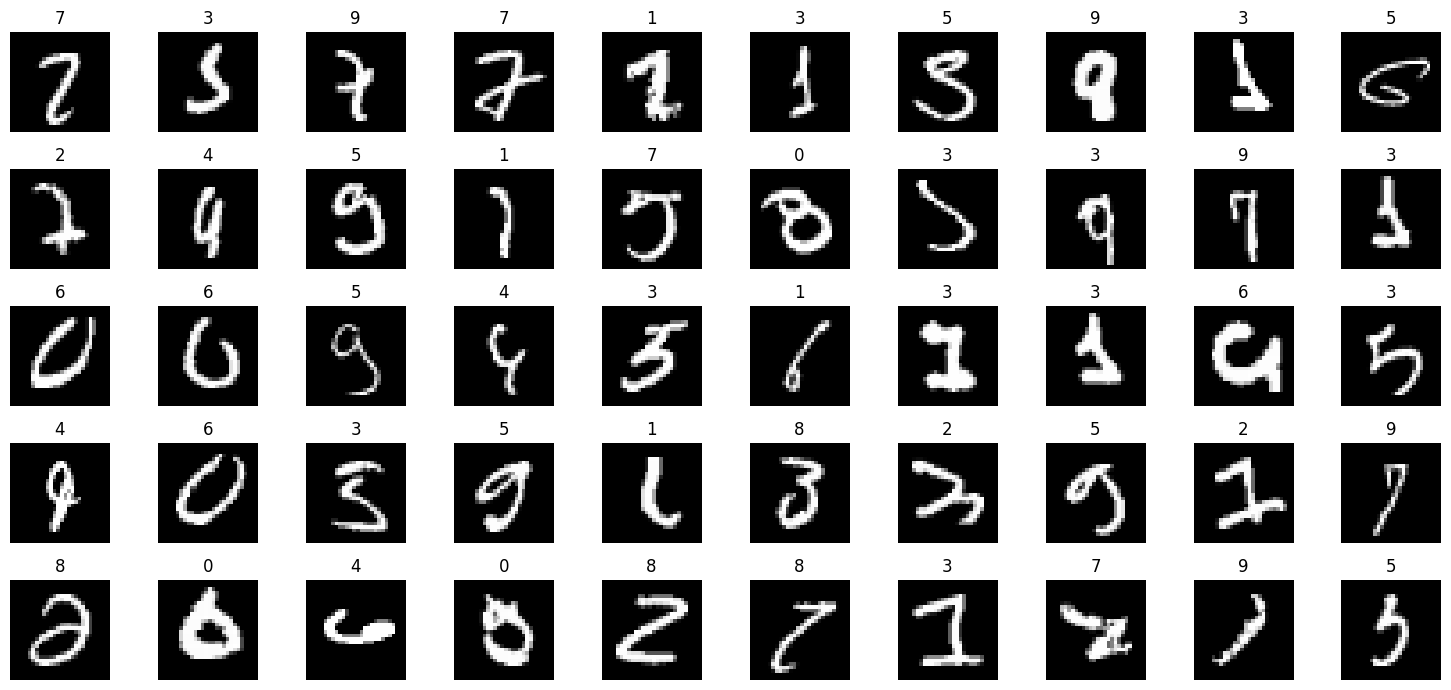

In [6]:
from ANNT import save_restore_images as saved, visualize_data as vz
import numpy as np

#give the location of the npz files
image_location= r"./logs/inference_log/mnist-FP/incorrect_pred_images.npz"

#load npz object from npz files
npz_image = saved.save_or_load_image__npz("load", image_location)

#load images
images = npz_image.images
shape_images = npz_image.images.shape
labels = npz_image.labels
shape_labels = labels = npz_image.labels.shape
#array of image index as stored in the original dataset
image_index =npz_image.image_index
image_index_shape =npz_image.image_index.shape


#view labels
print(npz_image.labels)
#view index
print(npz_image.image_index)
#print shapes
print(shape_images)
print(shape_labels)
print(image_index_shape)

#visualize images
vz.plot_images_labels(images, npz_image.labels, 50)


# Compare with original data

this is a custom class
Shuffle is: ./MnistData
[0830 14:51:43 @fs.py:101] WRN Env var $TENSORPACK_DATASET not set, using /home/jovyan/tensorpack_data for datasets.
[0830 14:51:43 @fs.py:104] Created the directory /home/jovyan/tensorpack_data.
[0830 14:51:43 @mnist.py:21] Downloading to /home/jovyan/tensorpack_data/mnist_data/t10k-images-idx3-ubyte.gz...


t10k-images-idx3-ubyte.gz: 1.65MB [00:00, 9.11MB/s]                            

[0830 14:51:43 @fs.py:73] Succesfully downloaded t10k-images-idx3-ubyte.gz. 1648877 bytes.
extracting images...


data shape is... (10000, 28, 28)
[0830 14:51:43 @mnist.py:21] Downloading to /home/jovyan/tensorpack_data/mnist_data/t10k-labels-idx1-ubyte.gz...


t10k-labels-idx1-ubyte.gz: 8.19kB [00:00, 174kB/s]

[0830 14:51:43 @fs.py:73] Succesfully downloaded t10k-labels-idx1-ubyte.gz. 4542 bytes.


(10000, 28, 28)


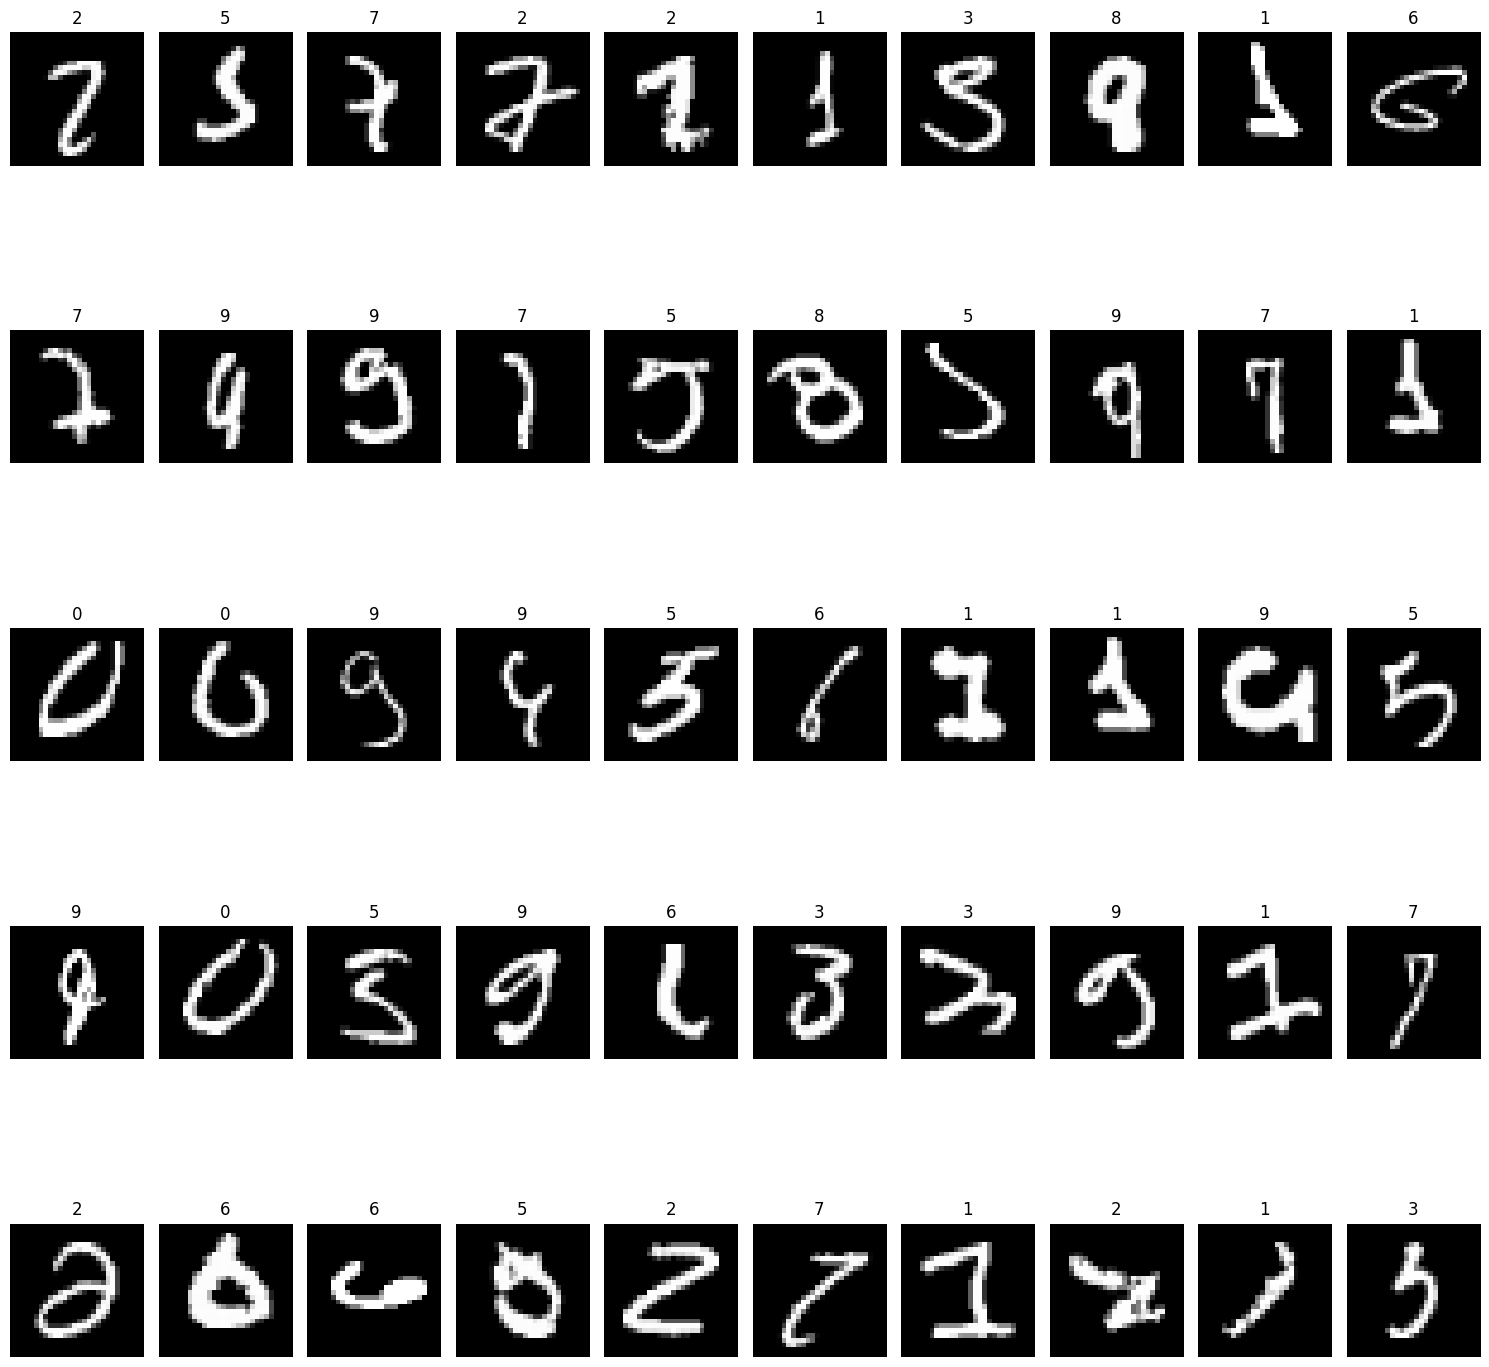

In [7]:
from ANNT.DataSets import mnist
from ANNT import visualize_data as vz
import numpy as np

#location of the mnist directory
Mnist_Data_Dir = r"./MnistData"
original_images_labels = mnist.GetMnist('test', Mnist_Data_Dir)
#print shape of tensor
print(original_images_labels.images.shape)

#visualize data
vz.plot_images_labels_by_index(original_images_labels.images, original_images_labels.labels, npz_image.image_index,50)